#Algoritmos Genéticos

2. Una empresa proveedora de energía eléctrica dispone de cuatro plantas de generación para
satisfacer la demanda diaria de energía eléctrica en Cali, Bogotá, Medellín y Barranquilla. Cada una
puede generar 3, 6, 5 y 4 GW al día respectivamente. Las necesidades de Cali, Bogotá, Medellín y
Barranquilla son de 4, 3, 5 y 3 GW al día respectivamente. Los costos por el transporte de energía
por cada GW entre plantas y ciudades se dan en la siguiente tabla:

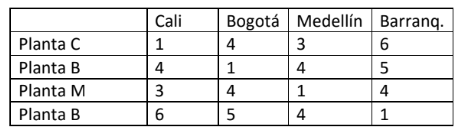

Los costos del KW-H por generador se dan en la siguiente tabla:

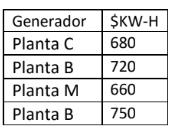

Encontrar usando AGs el mejor despacho de energía minimizando los costos de transporte y
generación.

In [2]:
#Costos

EnergiaMaxima=[3,6,5,4]
EnergiaRequerida=[4,3,5,3]
MatrixCostoTransporteEnergia=[[1,4,3,6],[4,1,4,5],[3,4,1,4],[6,5,4,1]]
VectorCostoGenerador=[680,720,660,750]

Ejemplo=[[2,5,5,3],[1,1,0,0],[1,0,2,2],[2,0,2,1],[0,2,1,0]]
Ejemplo2=[[1,1,0,0],[2,0,2,2],[4,0,2,1],[0,2,1,0]]

def CostoTotal(Plantas):
  resultado=0
  for i in range(len(Plantas)):
    #print(i)
    for j in range(len(Plantas[0])):
      resultado+=Plantas[i][j]*MatrixCostoTransporteEnergia[i][j]
      #print(j)
  for i in Plantas:
    resultado+=CostoGeneracion(i)

  return resultado


def CostoGeneracion(Planta):
  resultado=0
  for i in range(len(Planta)):
    resultado+=Planta[i]*VectorCostoGenerador[i]
  return resultado

CostoTotal(Ejemplo2)




12533

In [3]:
import random
def G_Poblacion(k):
  i=0
  Pob=[]
  while i<k:
    u=[]
    j=0
    while j<4:
      y=random.randint(0,6)
      u.append(y)
      j+=1
    Pob.append(u)
    i+=1
  return Pob

def G_Poblacion2():
  p11=Gen1()
  return p11, Gen2(p11)

def PlantaX(R):
  t=[]
  i=0
  while i<4:
    l=random.randint(0,R)
    t.append(l)
    i+=1
  if sum(t)>R:
    return PlantaX(R)
  else:
    return t

def Gen1():
  Gen1=[PlantaX(3),PlantaX(6),PlantaX(5),PlantaX(4)]
  return Gen1

def Gen2(Gen):
  Gen2=[]
  for i in Gen:
    for j in i:
      Gen2.append(j)
  return Gen2

def binario(x,lenb):
  z=np.zeros(lenb)
  i=1
  if x==0:
    return z
  while x>0:
    res=x%2
    z[lenb-i]=res
    x=x//2
    i+=1
  return z
p11=Gen1()
p1=Gen2(p11)
print(p1)


[0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2]


In [6]:


def binariost(pp1,len1,len2,len3,len4):
  i=0
  pp2=[]
  while i<17:
    i2=0
    while i2<4:
      pp2.append(binario(pp1[i],len1))
      i2+=1
      i+=1
    while i2<8:
      pp2.append(binario(pp1[i],len2))
      i2+=1
      i+=1
    while i2<12:
      pp2.append(binario(pp1[i],len3))
      i2+=1
      i+=1
    while i2<16:
      pp2.append(binario(pp1[i],len4))
      i2+=1
      i+=1
    return pp2



k=p1
print(k)
H=binariost(k,2,3,3,3)
print(Gen2(H))
#g=binariost(k,2,3,3,3)
#h=Gen2(g)
#print(h)
#print(binariost(k,2,3,3,3))

[0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]


In [55]:
def actitud1(gen,CapM1,CapM2,CapM3,CapM4):
  Act=0
  total=np.sum(gen)
  if np.sum(gen[0:4])>CapM1:
    Act+=1/(np.sum(gen[0:4])-CapM1)
  else:
    Act+=1*(1-0.1*((-np.sum(gen[0:4])+CapM1)))
  if np.sum(gen[4:8])>CapM2:
    Act+=1/(np.sum(gen[4:8])-CapM2)
  else:
    Act+=1*(1-0.1*(-np.sum(gen[4:8])+CapM2))
  if np.sum(gen[8:12])>CapM3:
    Act+=1/(np.sum(gen[8:12])-CapM3)
  else:
    Act+=1*(1-0.1*(-np.sum(gen[8:12])+CapM3))
  if np.sum(gen[12:16])>CapM4:
    Act+=1/(np.sum(gen[12:16])-CapM4)
  else:
    Act+=1*(1-0.1*(-np.sum(gen[12:16])+CapM4))
  return Act


def actitud2(gen,Nec1,Nec2,Nec3,Nec4):
  Act=0
  C1=gen[0]+gen[4]+gen[8]+gen[12]
  C2=gen[1]+gen[5]+gen[9]+gen[13]
  C3=gen[2]+gen[6]+gen[10]+gen[14]
  C4=gen[3]+gen[7]+gen[11]+gen[15]
  if C1<Nec1:
    Act+=1000/(-C1+Nec1)
  else:
    Act+=1000000*(1-0.1*(-Nec1+C1))
  if C2<Nec2:
    Act+=1000/(-C2+Nec2)
  else:
    Act+=1000000*(1-0.1*(-Nec2+C2))
  if C3<Nec3:
    Act+=1000/(-C3+Nec3)
  else:
    Act+=1000000*(1-0.1*(-Nec3+C3))
  if C4<Nec4:
    Act+=1/(-C4+Nec4)
  else:
    Act+=1000000*(1-0.1*(-Nec4+C4))
  return Act

print(actitud2([1, 2, 2, 0,
                1, 0, 2, 0,
                1, 1, 0, 2,
                1, 0,1, 0],4,3,5,3))

def actitud3(gen):
  Act=1/(CostoTotal(gen))
  return Act



3000001.0


In [8]:
def poblacion(N):
  Poblacion=[]
  Poblacion2=[]
  i=0
  while i<N:
    k,l=G_Poblacion2()
    Poblacion.append(l)
    Poblacion2.append(k)
    i+=1
  return Poblacion,Poblacion2

re=poblacion(4)
#print(re)
for i in re:
  print(i)

def actitudes(Poblacion):
  actV=[]
  for i in range(len(Poblacion[0])):
    actV.append(actitud1(Poblacion[0][i],3,6,5,4)+actitud2(Poblacion[0][i],4,3,5,3)+actitud3(Poblacion[1][i]))
  return actV


kk=actitudes(re)
#print(kk)

def Probabilidad(actitud):
  actitudT=np.sum(actitud)
  Probabilidad=[]
  for i in range(len(actitud)):
    Probabilidad.append(actitud[i]/actitudT)
    i+=1
  return Probabilidad


tt=Probabilidad(kk)
#print(tt)

def ruleta(Poblacion, Probabilidad):
  i=0
  j=0
  Padres=[]
  while i<len(Probabilidad):
    k=random.random()
    if j>len(Probabilidad)-1:
      j=0
    elif k<Probabilidad[j]:
      Padres.append(Poblacion[0][j])
      j+=1
      i+=1
    else:
      j+=1
  return Padres
rr=ruleta(re,tt)
#print(rr)

l=[]
for i in rr:
  l.append(Gen2(binariost(i,2,3,3,3)))

#print(l)
def cruce(Padres):
    i = 0
    K = len(Padres)
    hijos =[]
    while i < K:
        crom1 = Padres[i]
        crom2 = Padres[i+1]
        pt = randint(1, len(crom1)-1)
        hijo1 = crom1[:pt] + crom2[pt:]
        hijo2 = crom2[:pt] + crom1[pt:]
        hijos.append(hijo1)
        hijos.append(hijo2)
        i = i +2;
    return(hijos)

hijos=cruce(l)
#print(hijos)

def mutacion(hijos):
    Hijos=hijos
    k1=random.randint(0,len(Hijos)-1)
    k2=random.randint(0,len(Hijos[0])-1)
    if Hijos[k1][k2]==0:
      Hijos[k1][k2]=1
    else:
      Hijos[k1][k2]=0
    return Hijos

jj=mutacion(hijos)
#print(jj[0])
#print(len(jj[0]))

def decimal(Gen,len1):
  r=0
  k=1
  for i in Gen:
    r+=i*2**(len1-k)
    k+=1
  return r

#print(decimal([0,1],2))
def decodificar(gen):
  Gen=[]
  i=0
  k=0
  Gen.append(decimal(gen[0:2],2))
  Gen.append(decimal(gen[2:4],2))
  Gen.append(decimal(gen[4:6],2))
  Gen.append(decimal(gen[6:8],2))
  while i<12:
    Gen.append(decimal(gen[8+k:11+k],3))
    i+=1
    k+=3
  return Gen

#print(jj)
N=[]
for i in jj:
  N.append(decodificar(i))
#print(N)
#print(decodificar(jj[0]))
#ejemplo=[1,1,1,1]
#print(decimal(ejemplo,4))

print(re[0])

[[2, 1, 0, 0, 1, 3, 0, 2, 2, 2, 0, 0, 3, 0, 1, 0], [1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0], [0, 0, 3, 0, 1, 0, 3, 2, 0, 1, 2, 1, 0, 3, 0, 0], [1, 1, 0, 1, 0, 3, 1, 1, 0, 1, 3, 1, 2, 0, 0, 1]]
[[[2, 1, 0, 0], [1, 3, 0, 2], [2, 2, 0, 0], [3, 0, 1, 0]], [[1, 0, 0, 1], [1, 2, 0, 1], [1, 0, 1, 2], [2, 0, 2, 0]], [[0, 0, 3, 0], [1, 0, 3, 2], [0, 1, 2, 1], [0, 3, 0, 0]], [[1, 1, 0, 1], [0, 3, 1, 1], [0, 1, 3, 1], [2, 0, 0, 1]]]
8
6
1
2
5
2
3
4
1
4
8
3
3
5
4
4
[[2, 1, 0, 0, 1, 3, 0, 2, 2, 2, 0, 0, 3, 0, 1, 0], [1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0], [0, 0, 3, 0, 1, 0, 3, 2, 0, 1, 2, 1, 0, 3, 0, 0], [1, 1, 0, 1, 0, 3, 1, 1, 0, 1, 3, 1, 2, 0, 0, 1]]


In [56]:
def alg_gen(iteraciones,pobl):
  iii=0
  re=poblacion(pobl)
  #print(re)
  while iii<iteraciones:
    print(re[1])
    Pl=[]
    kk=actitudes(re)
    #print(np.max(kk))
    tt=Probabilidad(kk)
    rr=ruleta(re,tt)
    l=[]
    for i in rr:
      l.append(Gen2(binariost(i,2,3,3,3)))

    hijos=cruce(l)
    jj=mutacion(hijos)
    N=[]
    for i in jj:
      N.append(decodificar(i))
    iii+=1
    N.append(CrMatriz(N))
    N0=[]
    #print(N[3])
    for i in range(pobl):
      N0.append(N[i])
    N11=[]
    N1=[]
    #print(N[pobl])
    for j in range(pobl):
      for i in range(4):
        N11.append(N[pobl][i])
        #print(N11)

    for i in range(pobl):
      p11=N11[4*i:4*i+4]
      N1.append(p11)

    arr=(N0,N1)
    re=arr
    #p11=N11[0:4]
    #N1.append(p11)
    #p12=N11[4:8]
    #N1.append(p12)
    #N11.append(N[pobl])
    #for i in range(poblobl):
     # N11.append(N[2+j][0+4*i:4+4*i])


    #for j in range(pobl):
     # for i in range(4):
      #  N11.append(N[2+j][0+4*i:4+4*i])
    #11=N11[0]

    #N11.append(N[2][0:4])
    #N11=N11[0]
    #N12=[]
    #N12.append(N[2][4:8])
    #N12=N12[0]
    #N1=[]
    #N1.append(N11)
    #N1.append(N12)
    #rer=(N0,N11)
    #print(rer)
    #re=rer
  #for i in range(pobl):
    #print(N[pobl])
  return re

def CrMatriz(ar):
  NMa=[]
  for i in ar:
      NMa.append(i[0:4])
      NMa.append(i[4:8])
      NMa.append(i[8:12])
      NMa.append(i[12:16])
  return NMa


k=alg_gen(100,100)
aku=k[1]
Costos=[]
for i in aku:
  Costos.append(CostoTotal(i))
  #print(i)
print(np.min(Costos))

[[[1, 1, 0, 1], [0, 1, 3, 1], [1, 0, 1, 0], [1, 1, 2, 0]], [[0, 0, 0, 0], [2, 0, 2, 2], [1, 0, 1, 3], [1, 0, 0, 3]], [[2, 0, 1, 0], [0, 0, 6, 0], [1, 0, 1, 0], [0, 0, 3, 1]], [[0, 0, 1, 0], [0, 0, 6, 0], [0, 5, 0, 0], [0, 1, 0, 3]], [[1, 0, 0, 1], [3, 2, 0, 0], [2, 0, 2, 1], [1, 2, 1, 0]], [[0, 1, 2, 0], [4, 0, 1, 0], [3, 2, 0, 0], [0, 3, 1, 0]], [[0, 0, 2, 1], [0, 1, 1, 4], [0, 1, 0, 1], [0, 1, 1, 1]], [[1, 1, 0, 1], [1, 0, 2, 2], [0, 0, 2, 1], [1, 0, 0, 0]], [[0, 1, 2, 0], [1, 1, 0, 0], [1, 0, 0, 2], [2, 2, 0, 0]], [[1, 1, 0, 0], [2, 0, 0, 0], [1, 2, 2, 0], [1, 0, 3, 0]], [[0, 0, 0, 1], [1, 0, 5, 0], [0, 1, 2, 2], [0, 1, 1, 2]], [[1, 1, 0, 1], [4, 0, 1, 1], [3, 1, 0, 1], [1, 1, 1, 0]], [[0, 1, 0, 2], [1, 1, 1, 2], [1, 2, 0, 1], [1, 1, 1, 1]], [[0, 1, 1, 1], [0, 2, 1, 1], [0, 0, 1, 0], [1, 2, 0, 0]], [[1, 0, 0, 2], [1, 0, 5, 0], [1, 1, 1, 2], [2, 1, 0, 0]], [[0, 1, 1, 1], [0, 4, 0, 0], [0, 4, 0, 0], [1, 0, 0, 1]], [[0, 0, 0, 0], [0, 0, 2, 1], [0, 0, 1, 1], [1, 1, 0, 0]], [[0, 0, 1, 2]

In [5]:
from numpy.random import randint
from numpy.random import rand
import random
import math
import numpy as np

In [ ]:
Casos=[[0,0],[0,1],[1,0],[1,1]]
def sigma(A):
  Z1=[]
  Z2=[]
  for i in A:
    z1=0.3+0.2*i[0]+0.1*i[1]
    z2=0.5+0.1*i[0]+0.5*i[1]
    Z1.append(z1)
    Z2.append(z2)
  return Z1,Z2



print(sigma(Casos))

pob=random.uniform(0,0.5)



print(pob)

([0.3, 0.4, 0.5, 0.6], [0.5, 1.0, 0.6, 1.1])
0.20651382525590178


In [ ]:
Datos=[[1202,1203,1205,1201,1204,1203,1202,1203]
 [1208,1210,1209,1210,1210,1207,1207,1209,1208,1207],
  [1211,1212,1211,1213,1212,1212,1211,1214,1212,1212]]
Media=[]